In [2]:
%load_ext autoreload
%autoreload 2

# Using the perceptron 

In [3]:
from src.perceptron import Perceptron
from src.adaline import AdalineGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
iris_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
iris_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
y = iris_df.iloc[0:100, [4]].values

In [7]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [8]:
y = y.reshape(100,)

In [9]:
X = iris_df.iloc[0:100, [0,2]].values

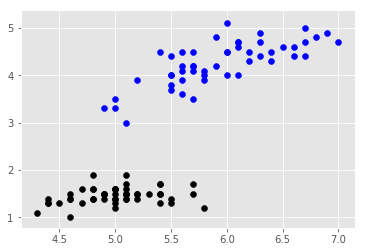

In [10]:
fig, ax = plt.subplots()
for feat, label in zip(X,y):
    if label == -1:
        ax.scatter(feat[0], feat[1], c='k')
    else:
        ax.scatter(feat[0], feat[1], c='b')

In [11]:
randomizer = np.arange(0,100)

In [12]:
np.random.shuffle(randomizer)

In [13]:
split = 80
train, test = randomizer[:split], randomizer[split:]

In [61]:
pct = Perceptron(eta=0.1, n_iter=10)
pct.fit(X, y)

In [62]:
errors = 0 
for feat,label in zip(X[test],y[test]):
    errors += int(np.where(pct.predict(feat) == label, 0, 1))
print float(errors)/len(X[test])

0.0


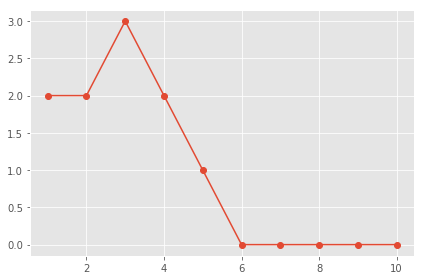

In [63]:
fig, ax = plt.subplots()
ax.plot(range(1,len(pct._errors)+1), pct._errors, marker='o')
plt.tight_layout()

### Adaptive Linear Neurons (Adaline)

We want to minimize the cost function with gradient decscent:

$$J(w)=\frac{1}{2}\sum_i\left(y^{(i)}-\phi\left( z^{(i)}\right)\right)^2$$

Here we are minimizing the sum of square errors between the calculated outcomes and the true class labels.

In [41]:
ada = AdalineGD(n_iter=5)

In [42]:
ada.fit(X[train], y[train])

In [43]:
errors = 0
for p,l in zip(ada.predict(X[test]),y[test]):
    if p != l:
        errors += 1
print float(errors)/len(X[test])

0.6


So bad because I need to standardize my featurespace.